In [40]:
import nltk
import re
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')
stop_words.extend(['ca','nt'])


In [166]:
FILEURL = r"C:\Users\imtechaddict\Downloads\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"
# C:\Users\imtechaddict\Downloads\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
# C:\Users\imtechaddict\Downloads\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19 - Copy.csv
COL_REVIEW_TEXT = 'reviews.text'

file_data = pd.read_csv(FILEURL)
reviews = file_data[COL_REVIEW_TEXT]


In [167]:
splitted_reviews = []

for each_reviews in reviews:
    splitted_review = sent_tokenize(each_reviews)
    for each_splitted_review in splitted_review:
        splitted_reviews.append(each_splitted_review)


In [168]:
print(len(reviews))
print(len(splitted_reviews))

5000
13168


# Using bert pretrained for transfer learning technique

In [169]:
bert_encoder = SentenceTransformer('bert-base-nli-mean-tokens')
reviews_embedding = bert_encoder.encode(reviews)

In [170]:
print(reviews_embedding.shape)

(5000, 768)


# Clustering Feature based on the textual Similarity using Kmean 



In [171]:
cluster_inertia = []
K = range(1, 10) # trying k value from a random range just to find the best K value
X = reviews_embedding 
for k in K:
    kmean_model = KMeans(n_clusters=k).fit(X)
    cluster_inertia.append(kmean_model.inertia_)


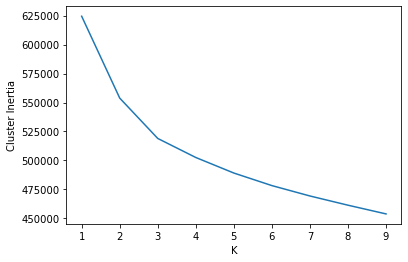

In [172]:
plt.plot(K, cluster_inertia)
plt.xlabel('K')
plt.ylabel('Cluster Inertia')
plt.show()

# Re Training K mean after choosing K value = 3


In [173]:
K=3
pred = KMeans(n_clusters=K).fit_predict(X)

# Empirically  observing the results exported in csv format.


In [174]:
sample = pd.DataFrame()
sample["reviews"] = reviews
sample["cluster_id"] = pred
# sample.to_csv(r"C:\Users\imtechaddict\Downloads\sample10.csv")

# Here begins the topic modeling for bi gram for each clusters

In [175]:
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    return True

def clean_text(raw_text):
    tokens = word_tokenize(raw_text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    words = [w for w in words if not w in stop_words]
    clean_output = " ".join(words)
    return clean_output

In [176]:
sample['clean_data']=sample['reviews'].apply(clean_text)

In [177]:
sample

,reviews,cluster_id,clean_data
0,I thought it would be as big as small paper bu...,2,thought would big small paper turn like palm t...
1,This kindle is light and easy to use especiall...,1,kindle light easy use especially beach
2,Didnt know how much i'd use a kindle so went f...,2,didnt know much use kindle went lower end im h...
3,I am 100 happy with my purchase. I caught it o...,2,happy purchase caught sale really good price n...
4,Solid entry level Kindle. Great for kids. Gift...,0,solid entry level kindle great kids gifted kid...
...,...,...,...
4995,This is a great tablet for the price. Amazon i...,1,great tablet price amazon good job
4996,This tablet is the perfect size and so easy to...,1,tablet perfect size easy use read play games p...
4997,Purchased this for my son. Has room to upgrade...,2,purchased son room upgrade memory allow books ...
4998,I had some thoughts about getting this for a 5...,0,thoughts getting year old get screen protector...


In [178]:
# bigram_measures = nltk.collocations.BigramAssocMeasures()
stop_word_list = set(stopwords.words('english'))
for i in range(K):
    each_cluster_data = sample[sample["cluster_id"] == i]
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    clean_reviews = each_cluster_data["clean_data"]
    finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in clean_reviews])
    finder.apply_freq_filter(15)
    bigram_scores = finder.score_ngrams(bigram_measures.pmi)
    print("-----------")
    print("Cluster",i)
    print("-----------")
    for each_bigram in bigram_scores[:10]:
        print(each_bigram[0][0], "",each_bigram[0][1])



-----------
Cluster 0
-----------
parental  controls
user  friendly
battery  life
highly  recommend
every  day
sound  quality
yr  old
christmas  present
watch  movies
fire  hd
-----------
Cluster 1
-----------
user  friendly
battery  life
recommend  anyone
smart  home
highly  recommend
definitely  recommend
would  definitely
echo  plus
best  buy
echo  show
-----------
Cluster 2
-----------
black  friday
sd  card
battery  life
page  turn
year  old
google  play
fire  hd
best  buy
app  store
sound  quality


#  Topic Modeling without clustering 

In [179]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
clean_reviews = sample["clean_data"]
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in clean_reviews])
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)
for each_bigram in bigram_scores[:15]:
    print(each_bigram[0][0], "",each_bigram[0][1])


battery  life
year  old
smart  home
google  play
fire  hd
best  buy
sound  quality
would  recommend
echo  plus
echo  dot
amazon  prime
echo  show
works  well
play  games
daughter  loves
